# Raw Precip Binning Methodology 

This notebook examines the first pass of the stochastic state matrix. The training points are binned by precip quantile, and then a separate NN is trained for each precip bin. A transition matrix is defined based on the training data using the observed probabilities of transitioning from one precip bin to another. 

We see that this stochastic scheme results in an imbalance of training points by latitude, such that certain latitudes have very few training points for certain bins. Furthermore, the state-agnostic transition scheme results in a balanced rate of precip bins by latitude when predicting, while the true bins are imbalanced. 

The results call for a binning methodology that is not correlated with latitude, and demonstrates the need for a state-aware transition scheme. 

In [1]:
from stochastic_parameterization.stochastic_state_model import (
    StochasticStateModel,
)
from stochastic_parameterization.examine_stochastic_state_model import plot_true_eta_vs_simulated_eta
from stochastic_parameterization.eta_heat_map import (
    plot_one_point_in_time,
    plot_tropis_heatmaps,
    plot_full_dataset_heatmaps,
)

The bins follow the precip:

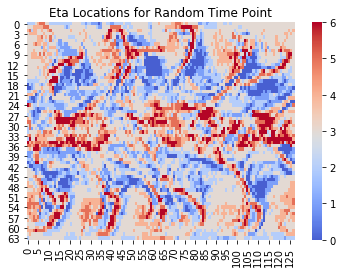

In [2]:
plot_one_point_in_time()

But the number of training points for each eta are strongly correlated with latitude (and longitude to a degree).

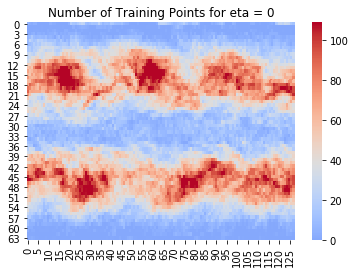

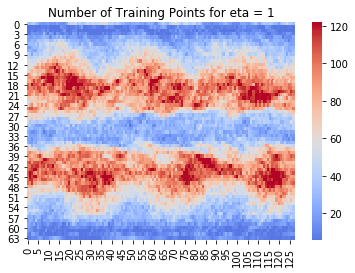

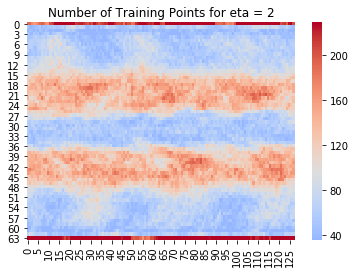

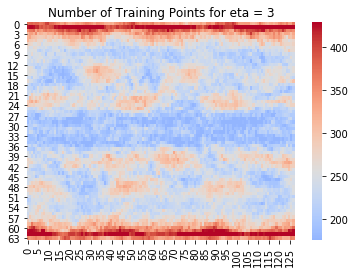

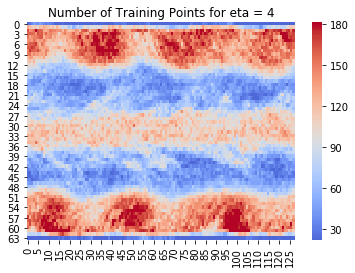

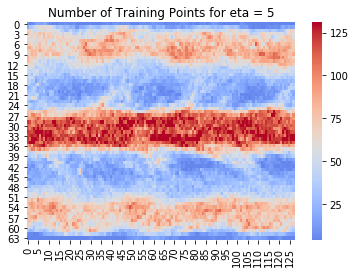

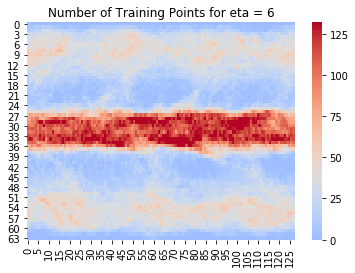

In [3]:
plot_full_dataset_heatmaps()

If we limit to the tropics, this correlation with latitude and longitude is diminished:

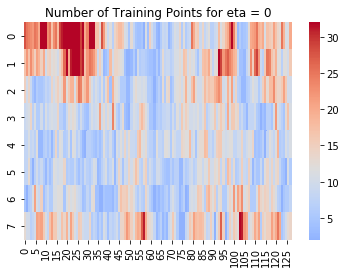

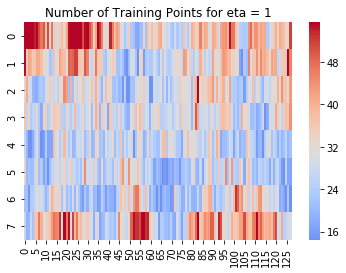

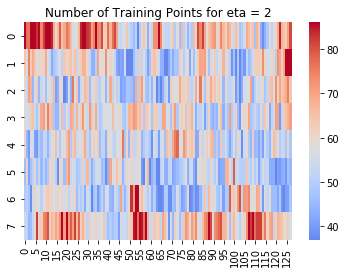

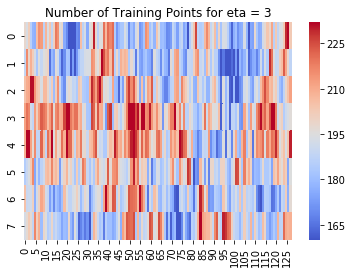

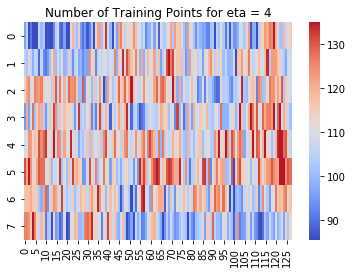

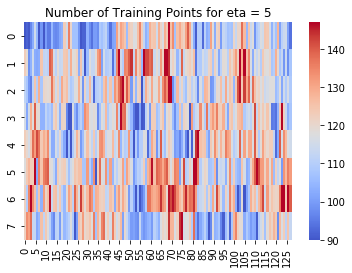

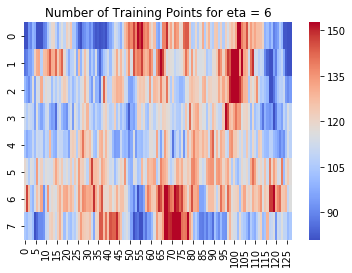

In [4]:
plot_tropis_heatmaps()

What happens when we run the model forward using our stochastic scheme? The plots below contain the entire training dataset, and the stochastic state model with the transition matrix updated 640 times with a 3 hour time step. The true eta distribution varies by latitude, but the simulated distribution is uniform. 

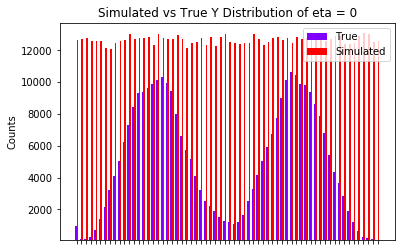

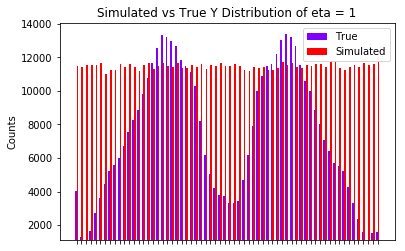

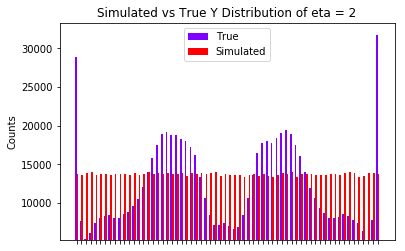

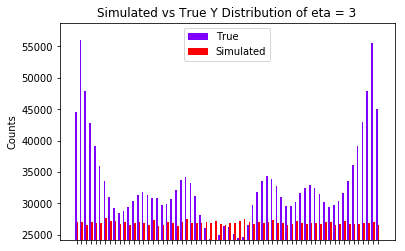

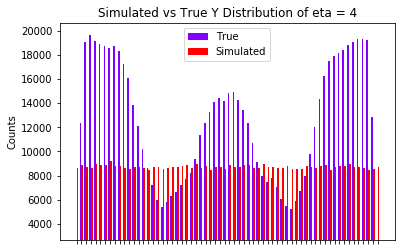

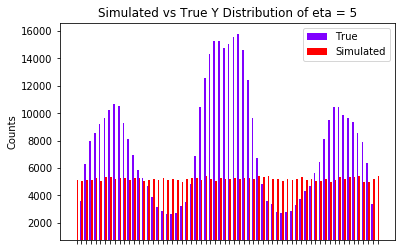

In [5]:
plot_true_eta_vs_simulated_eta()

We see some strange behavior near the boundaries for eta = 2. This indicates that the boundaries should be excluded from the binning. 

The plan to address these issues is to use a different binning strategy. A neural network will be trained on all of the data, and then the predicted precip residuals will be used to bin by quantile. Hopefully these will be more evenly distributed by latitude.